## Group 8

1. Arjun Gupta    - 180010012
2. Yash Chauhan   - 180010019
3. Priyansh Patil - 180010044
4. Samar Jain     - 180010052
5. Swarit Sood    - 180010056

In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd C:\Samar\Academics\Sem_2\AE102\GroupAssignment
df = pd.read_csv('BlackFridayFinal.csv')

c:\samar\academics\sem_2\ae102\groupassignment


As discussed during the presentation, there was some confusion as to which graphs use the number of people, which use the number of purchases and which use the amount purchased, we will clear each point using comments.

The data itself contains 537577 entries, each of which is a separate purchase.
There is a total of 6040 different people, the data is drawn from credit card information of users of a certain company (we know this because we looked at many notebooks corresponding to this dataset, but it is not explicitly mentioned with the data)

(We also clipped off two extra columns from the actual data which depicted secondary and tertiary product categories since we could not efficiently analyze them)

In [3]:
dfuser = df.drop(['Purchase', 'Product_Category', 'Product_ID'], axis = 1)
dfuser = dfuser.drop_duplicates()

We created the DataFrame 'dfuser' to have just the user's data like Gender, Age, etc irrespective of what they bought as some of our analysis looks at population analysis rather than the purchases

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,79.69


In [5]:
dfuser.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,F,0-17,10,A,2,0
4,1000002,M,55+,16,C,4+,0
5,1000003,M,26-35,15,A,3,0
6,1000004,M,46-50,7,B,2,1
9,1000005,M,26-35,20,A,1,1


# Analysing with respect to age of customers 

(Mostly coded by Arjun)

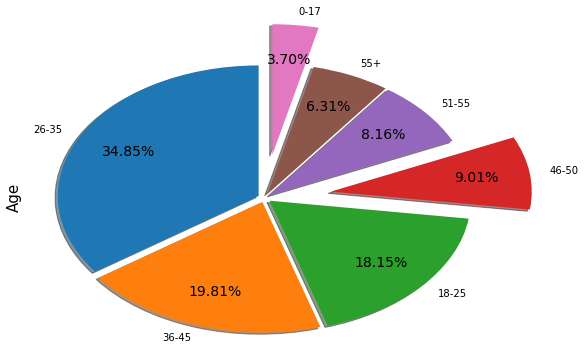

In [6]:
# Pie chart depicting a demographic of age among the users, notice that we have used dfuser DataFrame
dfuser['Age'].value_counts().plot(kind='pie', autopct = '%1.2f%%', pctdistance=.73, 
                                labeldistance=1.1, radius=1.5, startangle=90, 
                                explode=(.05, .05, .05,.5,.05,.05,.5),
                                shadow=True, textprops={'fontsize':14},)
ylabel('Age', labelpad=75, fontsize=15)

[1326590.0600000001, 9016692.8000000007, 19997491.060000002, 10106495.650000002, 4134182.23, 3619083.5600000001, 1976148.4199999999]


,Purchase,age
0,1326590.06,0-17
1,9016692.80,18-25
2,19997491.06,26-35
3,10106495.65,36-45
4,4134182.23,46-50
5,3619083.56,51-55
6,1976148.42,55+


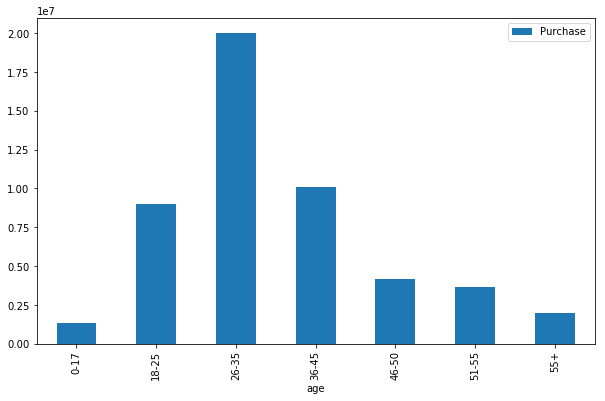

In [7]:
# Bar chart showing the amount of purchase done by the users, grouped according to age
age=['0-17','18-25', '26-35','36-45','46-50','51-55','55+']
purc=[]
for i in age:
    sump=sum(df[df['Age']==i]['Purchase'])
    purc.append(sump)
print(purc)
df_purc=pd.DataFrame({'age':age,'Purchase':purc})
df_purc.plot.bar(figsize = (10, 6), x = 'age')
df_purc

[90.201268783572459, 92.351975746154011, 93.145889701429979, 94.014787579419362, 92.848722768719398, 96.20616619703334, 94.53898579151317]


,Purchase,age
0,90.201269,0-17
1,92.351976,18-25
2,93.145890,26-35
3,94.014788,36-45
4,92.848723,46-50
5,96.206166,51-55
6,94.538986,55+


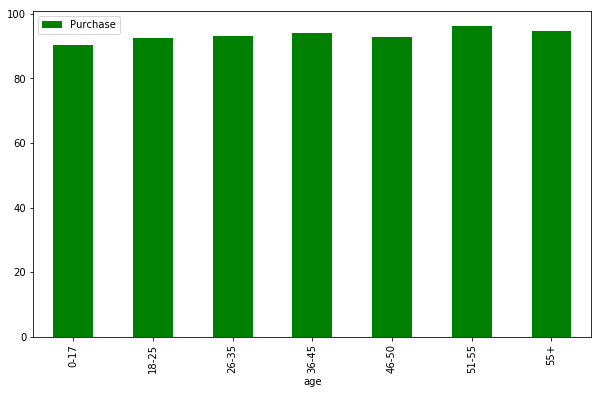

In [8]:
# Initially we thought that the age group 26-35 were the higher spenders and should be targeted to increase sales
# But it is actually the size of their population that leads to high purchase, not due to the virtue of their age
# As depicted below, the mean purchases of all age groups are nearly the same
age=['0-17','18-25', '26-35','36-45','46-50','51-55','55+']
meanpurc=[]
for i in age:
    sump=mean(df[df['Age']==i]['Purchase'])
    meanpurc.append(sump)
print(meanpurc)
df_meanpurc=pd.DataFrame({'age':age,'Purchase':meanpurc})
df_meanpurc.plot.bar(figsize = (10, 6), x = 'age', color = 'g')
df_meanpurc

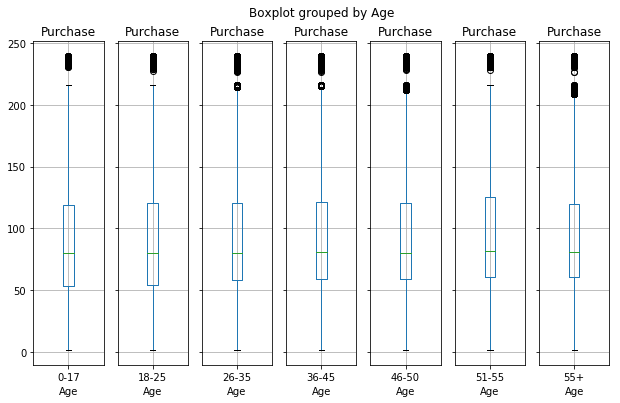

In [9]:
# Boxplots show that they even vary similarly, so it's not that different age groups behave differently
col = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
fig, axs = plt.subplots(1, 7, sharey=True, figsize = (10, 6))
for i in range(7):
    df[df.Age == col[i]].boxplot(by='Age', column=['Purchase'], ax = axs[i])

In [10]:
# Observing how the other categories are affected with age
def Age_Group(x):
    dfuser[dfuser['Age']==x].hist(figsize= (16, 6), column=['Marital_Status', 'Occupation'], grid=False, bins=25)
    df[df['Age']==x].hist(figsize= (16, 6), column=['Product_Category', 'Purchase'], grid=False, bins=25)
    plt.show()
interact(Age_Group, x={'0-17','18-25','26-35','36-45','46-50','51-55','55+'})
# Note : The purchase graph - xaxis = cost of product, yaxis = number of products bought

<function __main__.Age_Group>

# Looking at Gender and Marital Status

(Mostly coded by Priyansh)

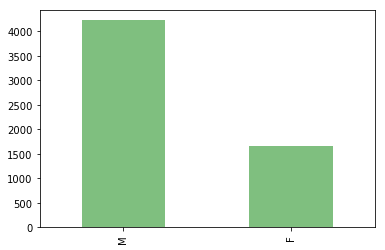

In [11]:
dfuser["Gender"].value_counts().plot.bar(color = ['green'], alpha = 0.5)
plt.show()
# Just looking at the population of shoppers according to gender

The sex ratio of US is 97.9 males per 100 females
So there is a strong correlation between gender and sales which could happen due to
1. The fact that males are more resilient and can shop easily compared to women in the rough environment of a Black Friday
2. Women perhaps asking their spouses to get the stuff for them

<Container object of 2 artists>

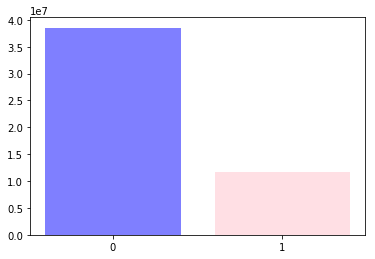

In [12]:
genderspend = []
gender = ['M', 'F']
genderval = [0, 1]
for i in range(2):
    gpurch = df[df['Gender'] == gender[i]]['Purchase'].sum()
    genderspend.append(gpurch)
plt.xticks([0, 1])
plt.bar(genderval, genderspend, color = ['b', 'pink'], alpha = 0.5)
# How much does each gender spend at a Black Friday

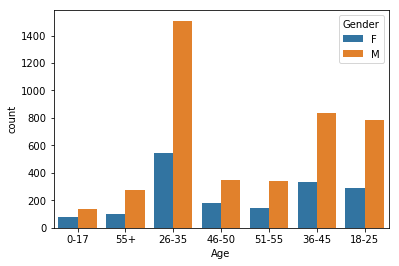

In [13]:
sns.countplot(dfuser['Age'],hue=dfuser['Gender'])
#Show the counts of observations in each categorical bin using bars
#hue input determines how the data will be plotted(here we have plotted it gender-wise)
#here two bar graphs of two genders on the same plot will be plotted

['F_0' 'M_0' 'M_1' 'F_1']


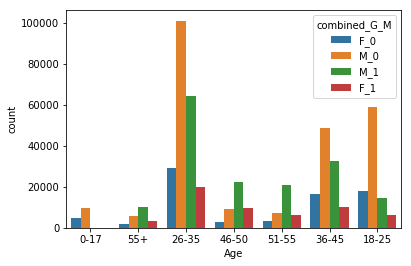

In [14]:
# Gender, marital status and product categories
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
#lambda is a function to define anonymus function i.e a fn without a name and  can have any number of arguments
#but only one expression, which is evaluated and returned.
#the code basically means we have defined a 'combined_G_M' object

#results 4 categories: married male , married female , unmarried male , unmarried female

print(df['combined_G_M'].unique())
#unique() returns unique values of Series object

sns.countplot(df['Age'],hue=df['combined_G_M'])
#plots all the four categories of 'combined_G_M' object versus age

So it is actually mostly bachelors who shop at Black Friday, so our spouse conclusion might be wrong. As sir mentioned, Black Friday focuses a lot on electronics and thus we see that bachelor males shop the most (in the age group 0-45 which is huge!)

# Occupation

(Mostly coded by Yash)

In [15]:
def mean_Occupation(o): # Finding the mean and median expenditures of people of each occupation
    dfi=df[df.Occupation==o]
    return dfi.Purchase.mean()
def median_Occupation(o):
    dfi=df[df.Occupation== o]
    return dfi.Purchase.median()

In [16]:
dfx=pd.DataFrame(columns=['Mean'])
for i in range(21):
    dfx.loc[i]=(pd.to_numeric(mean_Occupation(i)))
dfz=pd.DataFrame(columns=['Median'])
for i in range(21):
    dfz.loc[i]=(pd.to_numeric(median_Occupation(i)))
dfn=pd.DataFrame(columns=['Value'])
for i in range(21):
    dfn.loc[i]=((df['Occupation'].value_counts())[i]*dfx.Mean[i]/1000)

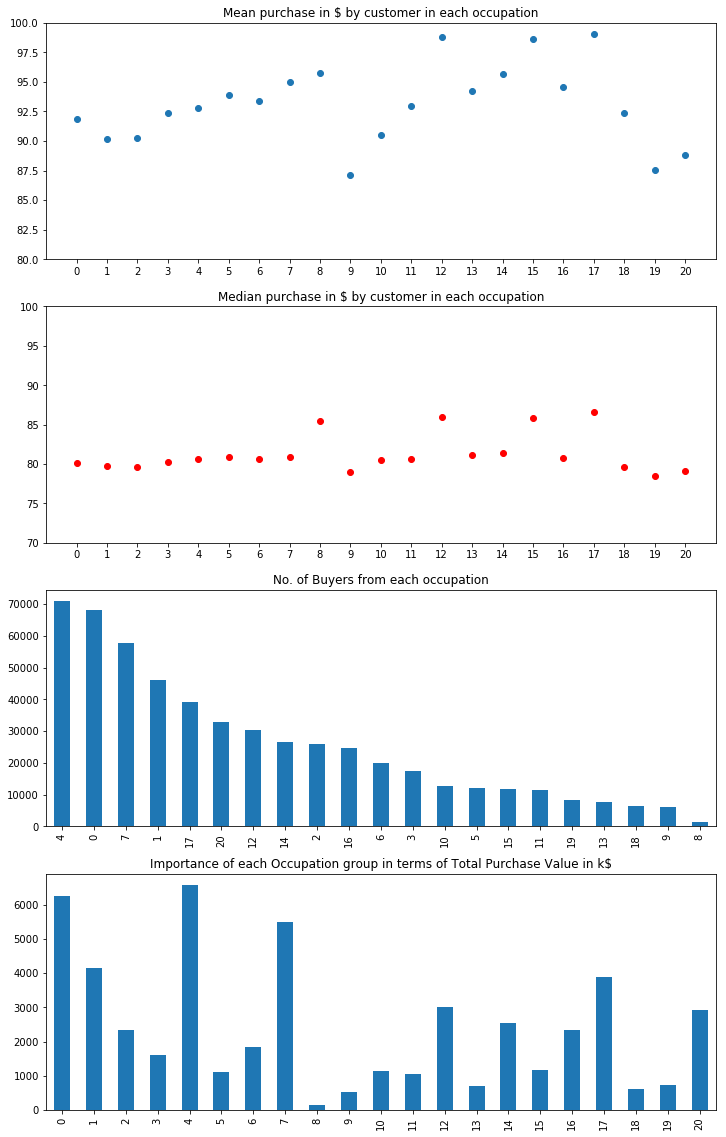

In [17]:
figure(figsize=(12,20))

subplot(4,1,1)
ylim(80,100)
xticks(np.arange(0,21))
plt.plot(dfx['Mean'], 'o')
plt.title('Mean purchase in $ by customer in each occupation')

subplot(4,1,2)
xticks(np.arange(0,21))
ylim(70,100)
plt.plot(dfz['Median'], 'o', color='r')
plt.title('Median purchase in $ by customer in each occupation')

subplot(4,1,3)
df['Occupation'].value_counts().plot('bar')
plt.title('No. of Buyers from each occupation')

subplot(4,1,4)
dfn['Value'].plot('bar')
plt.title('Importance of each Occupation group in terms of Total Purchase Value in k$')

#Changed the line plots to scatter plots as sir told

In [18]:
# Interactive plot to show which product categories interest which occupations
def Product_dist(p):
    figure(figsize=(8,6))
    plt.subplot(1,1,1)
    plt.ylim=(0,20000)
    (df[df.Product_Category==p])['Occupation'].value_counts().plot('bar')
    plt.show()
interact(Product_dist,p=(1,18,1))

<function __main__.Product_dist>

# City Category and Years of Stay

(Mostly coded by Swarit)

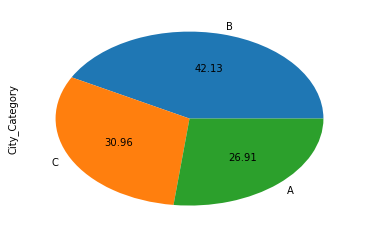

In [19]:
df['City_Category'].value_counts().plot(kind='pie', autopct='%0.2f')

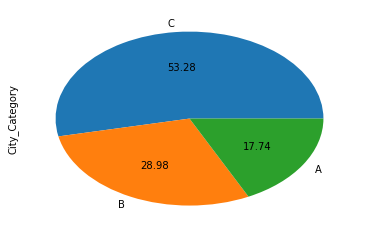

In [20]:
dfuser['City_Category'].value_counts().plot(kind='pie', autopct='%0.2f')
# The two pie charts show the difference between number of products bought vs the actual number of people who come to shop

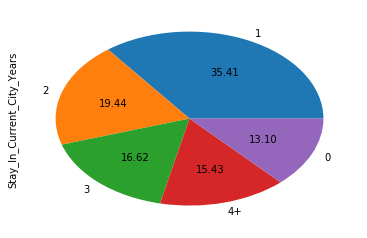

In [21]:
dfuser['Stay_In_Current_City_Years'].value_counts().plot(kind = 'pie', autopct='%0.2f')

In [22]:
# Variation of product category with years of stay
def bars_yrs(x):
    data=df[df['Stay_In_Current_City_Years']==x]
    data['Product_Category'].value_counts().plot(kind='bar')
    plt.show()
interact(bars_yrs,x=['0','1','2','3','4+'])

<function __main__.bars_yrs>

In [23]:
# Variation of product category with city category
def bars_city(x):
    data=df[df['City_Category']==x]
    data['Product_Category'].value_counts().plot(kind='bar')
    plt.show()
interact(bars_city,x=['A','B','C'])

<function __main__.bars_city>

In [24]:
# How city category affects the age demographic
def bars_city_age(x):
    dfA=dfuser[dfuser['City_Category']==x]
    dfA['Age'].value_counts().plot(kind='bar')
    plt.show()
interact(bars_city_age,x=['A','B','C'])

<function __main__.bars_city_age>

[12956687.970000003, 20834316.120000005, 16385679.690000003]


,City_category,Purchase
0,A,12956687.97
1,B,20834316.12
2,C,16385679.69


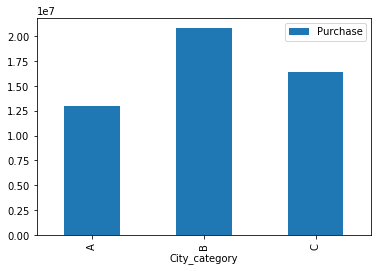

In [25]:
# City category and amount of purchase
City=['A','B','C']
dfa=df[df['City_Category']=='A']
dfb=df[df['City_Category']=='B']
dfc=df[df['City_Category']=='C']
suma=sum(dfa['Purchase'])
sumb=sum(dfb['Purchase'])
sumc=sum(dfc['Purchase'])
purchase=[suma,sumb,sumc]
print(purchase)
df_pur=pd.DataFrame({'City_category':City,'Purchase':purchase})
df_pur.plot.bar(x='City_category')
df_pur

[89.580110137031781, 91.986578481454188, 98.444418550160435]


,City_category,Purchase
0,A,89.580110
1,B,91.986578
2,C,98.444419


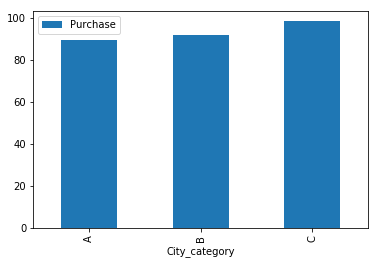

In [26]:
City=['A','B','C']
dfa=df[df['City_Category']=='A']
dfb=df[df['City_Category']=='B']
dfc=df[df['City_Category']=='C']
suma=mean(dfa['Purchase'])
sumb=mean(dfb['Purchase'])
sumc=mean(dfc['Purchase'])
purchasemean=[suma,sumb,sumc]
print(purchasemean)
df_pur=pd.DataFrame({'City_category':City,'Purchase':purchasemean})
df_pur.plot.bar(x='City_category')
df_pur
# We observed again that the means are nearly the same

[6725054.290000001, 17632439.170000002, 9346766.2600000016, 8725311.3000000007, 7747112.7599999998]


,Purchase,years_of_stay
0,6725054.29,0
1,17632439.17,1
2,9346766.26,2
3,8725311.30,3
4,7747112.76,4+


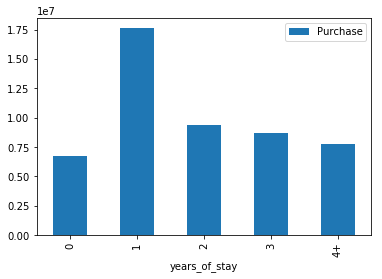

In [27]:
yrssty=['0','1','2','3','4+']
pur=[]
for i in yrssty:
    sump=sum(df[df['Stay_In_Current_City_Years']==i]['Purchase'])
    pur.append(sump)
print(pur)
df_purc=pd.DataFrame({'years_of_stay':yrssty,'Purchase':pur})
df_purc.plot.bar(x='years_of_stay')
df_purc

# Product Category

(Mostly coded by Samar)

<Container object of 18 artists>

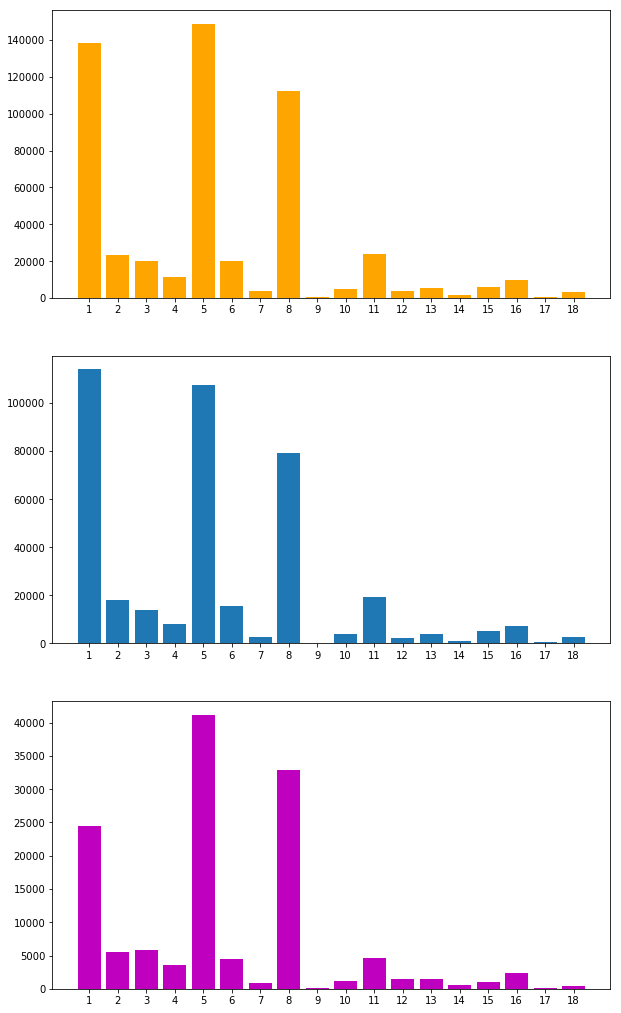

In [28]:
counter = np.zeros_like(range(18))
counterM = np.zeros_like(range(18))
counterF = np.zeros_like(range(18))
series = np.array(df['Product_Category'])
seriesM = np.array(df[df['Gender'] == 'M']['Product_Category'])
seriesF = np.array(df[df['Gender'] == 'F']['Product_Category'])
for i in range(1, 19):
    counter[i-1] = len(series[series == i])
    counterM[i-1] = len(seriesM[seriesM == i])
    counterF[i-1] = len(seriesF[seriesF == i])
figure(figsize=(10,18))

subplot(3,1,1)
plt.xticks(np.arange(1, 19)) #having all values on x-axis
plt.bar(range(1, 19), counter, color = 'orange')

subplot(3,1,2)
plt.xticks(np.arange(1, 19))
plt.bar(range(1, 19), counterM)

subplot(3,1,3)
plt.xticks(np.arange(1, 19))
plt.bar(range(1, 19), counterF, color = 'm')

# The blue and magenta plots represent gender, we guess that category 1 is electronics while 5 is clothing and apparel
# This guess checks out with the cost of the items, the contribution to total sales and the interest of 
# men and women in these categories
# Additionally, men are the second most interested in product 5 (which might as well be the effect of shopping for their spouses :P)

In [29]:
# Creating a dict of dataframes, indcategory[i] gives dataframe where product category is i.
indcategory = {}
for i in range(1, 19):
    indcategory[i] = df[df['Product_Category'] == i]

<Container object of 18 artists>

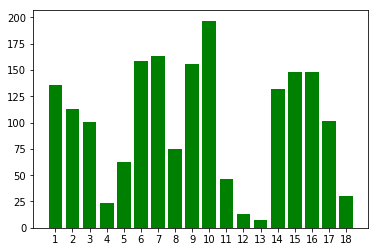

In [30]:
# Looking at mean sales in each category to give us an insight to the cost of products
mean_sale = []
for i in range(1, 19):
    mean_sale.append(indcategory[i]['Purchase'].mean())
plt.xticks(np.arange(1, 19))
plt.bar(range(1, 19), mean_sale, color = 'green')

<Container object of 18 artists>

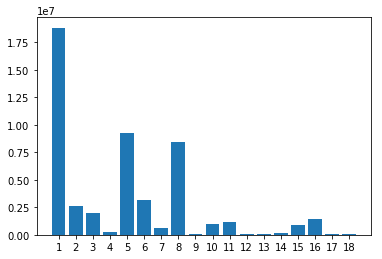

In [31]:
# Looking at net sales in each category
net_sale = []
for i in range(1, 19):
    net_sale.append(indcategory[i]['Purchase'].sum())
plt.xticks(np.arange(1, 19))
plt.bar(range(1, 19), net_sale)

Thus 5 is the cheapest product and also the most bought. 10 is the most expensive product.
However, owing to a slightly higher cost and number of sales, 1 contributes the most to sales. 

# Watching Customers Individually

In [32]:
# Users are numbered from 1000001 to 1006040
# Tracking what is the total expenditure by a particular customer
spent = {}
for i in range(1000001, 1006041):
    spent[i] = df[df['User_ID'] == i]['Purchase'].sum()

In [33]:
# Writing a function to print what a customer bought
def IsneKyaKyaKhareeda(custID):
    if(custID in range(1000001, 1006041)):
        dfcust = df[df['User_ID'] == custID]
        for i in range(1, 19):
            print('Customer spent $', dfcust[dfcust['Product_Category'] == i]['Purchase'].sum(), 'on product category', i)
        print('Customer spent $', spent[custID], 'totally')
    else:
       print('Customer ID invalid')

In [34]:
#Demonstration
IsneKyaKyaKhareeda(1001052)

Customer spent $ 189.56 on product category 1
Customer spent $ 164.17 on product category 2
Customer spent $ 271.41 on product category 3
Customer spent $ 0 on product category 4
Customer spent $ 1078.22 on product category 5
Customer spent $ 250.28 on product category 6
Customer spent $ 752.1 on product category 7
Customer spent $ 872.24 on product category 8
Customer spent $ 0 on product category 9
Customer spent $ 700.84 on product category 10
Customer spent $ 0 on product category 11
Customer spent $ 48.47 on product category 12
Customer spent $ 0 on product category 13
Customer spent $ 187.79 on product category 14
Customer spent $ 0 on product category 15
Customer spent $ 0 on product category 16
Customer spent $ 0 on product category 17
Customer spent $ 0 on product category 18
Customer spent $ 4515.08 totally


There were a lot of things we could have done, but owing to time constraints (and deadline panic) we couldn't.

Other than that, the assignment was a really fun activtiy for all of us.

Chief takeaways :

1) Write a good story when you are presenting.

2) Conclude rigorously, at no point can any of us be shaky or unconfident about what we are saying.

3) Clear out any confusion regarding what your plots represent.

4) (ctd. from 3) Always label your axes.

5) Be really careful with anonymized data and do not draw baseless conclusions.

# Thank You